<h2><center>Applied Machine Learning - Assignment 7</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np

<h3>Classification Datasets</h3>
<p>You can use any of the datasets (or both)</p>
<ul>
    <li>Iris dataset D_1: Target attribute classes: Iris Setosa, Iris Versicolour, Iris Virginica</li>
    <li>Wine Quality D_2 (use winequality-red.csv)</li>
</ul>
<p>Note: D_2 can also be used for a regression problem.</p>
<p>You are required to pre-process the given datasets.</p>

<h4>$D_1$ Iris Dataset</h4>

In [2]:
D_1 = pd.read_csv('res/iris.data', header = None)

<p>Since the CSV file lacks column headers, we need to add them manually using the information provided on the website.</p>

In [3]:
D_1.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

<p>To use the data for classification, we need to convert the class names from strings to integer values.</p>

In [4]:
class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
D_1['class'] = D_1['class'].map(class_map)

<h4>$D_2$ Wine Quality</h4>

In [5]:
D_2 = pd.read_csv('res/winequality-red.csv', sep = ';').astype(float)

<h3>Question 1 - Implement K-Nearest Neighbor (KNN)</h3>
<p>Your task is to implement the KNN algorithm. To implement KNN, you have to:</p>
<ul>
    <li>Split data into a train and test split (70% and 30% respectively).</li>
    <li>Implement a similarity (or a distance) measure. To begin with, you can implement the
Euclidean Distance.</li>
    <li>Implement a function that returns the top K Nearest Neighbors for a given query (data
point).</li>
    <li>Provide the prediction for a given query (for a classification task, you can use majority
voting; for regression, you can use the mean).</li>
    <li>Measure the quality of your prediction. [Hint: Choose a quality criterion according to the
task you are solving, i.e., a regression or classification task. Defend your choice].
</li>
</ul>

<h4>Solution:</h4>

<p>
In addition to splitting the data into training and testing sets, we will normalize it to ensure all features contribute equally to distance calculations. This prevents features with larger scales from dominating and biasing the results.</p>

In [6]:
def normalize(x):
    return (x - np.min(x, axis = 0)) / (np.max(x, axis=0) - np.min(x, axis = 0))

<h4>Task 1: $D_1$ train and test splitting</h4>

In [7]:
D_1 = D_1.sample(frac = 1)

In [8]:
D1_X = D_1[['sepal length', 'sepal width', 'petal length', 'petal width']].to_numpy()
D1_Y = D_1['class'].to_numpy()

In [9]:
D1_X = normalize(D1_X)

In [10]:
partition = round(len(D1_Y) * 0.7)

D1_Xtrain, D1_Ytrain = D1_X[:partition], D1_Y[:partition]
D1_Xtest, D1_Ytest = D1_X[partition:], D1_Y[partition:]

<h4>Task 1: $D_2$ train and test splitting</h4>

In [11]:
D_2 = D_2.sample(frac = 1)

In [12]:
D2_Y = D_2['quality'].to_numpy()
D2_X = D_2.drop('quality', axis = 1).to_numpy()

In [13]:
D2_X = normalize(D2_X)

In [14]:
partition = round(len(D2_Y) * 0.7)

D2_Xtrain, D2_Ytrain = D2_X[:partition], D2_Y[:partition]
D2_Xtest, D2_Ytest = D2_X[partition:], D2_Y[partition:]

<h4>Task 2: Euclidian Distance</h4>

In [15]:
def euclidian_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

<h4>Task 3: Top K Nearest Neighbours</h4>
<p>
The get_k_nearest_neighbors function calculates the distances from the given data point to all training data points, sorts them, and returns the k nearest neighbors.</p>

In [16]:
def get_k_nearest_neighbors(Xtrain, Ytrain, data_point, k):
    distances = [(euclidian_distance(data_point, x), y) for x, y in zip(Xtrain, Ytrain)]
    distances.sort(key = lambda x: x[0])
    return distances[:k]

<h4>Task 4: Classification with Majority Voting & Regression Prediction</h4>

In [17]:
from collections import Counter

def classify_majority_voting(Xtrain, Ytrain, data_point, k):
    neighbors = get_k_nearest_neighbors(Xtrain, Ytrain, data_point, k)
    neighbor_target_values = [y for _, y in neighbors]
    return Counter(neighbor_target_values).most_common(1)[0][0]

In [18]:
def predict_regression(Xtrain, Ytrain, data_point, k):
    neighbors = get_k_nearest_neighbors(Xtrain, Ytrain, data_point, k)
    neighbor_target_values = [y for _, y in neighbors]
    return sum(neighbor_target_values) / len(neighbor_target_values)

<h4>Task 5: Prediction Quality Measurement</h4>

<p>
To evaluate classification performance, we will use accuracy, while for regression, we will use RMSE (Root Mean Squared Error).</p>

In [19]:
def accuracy(Y_true, Y_prediction):
    correct = sum (t == p for t, p in zip(Y_true, Y_prediction))
    accuracy = (correct / len(Y_true)) * 100
    return accuracy

In [20]:
def rmse(Y_true, Y_prediction):
    rmse = np.sqrt(np.mean((Y_true - Y_prediction) ** 2))
    return rmse

<h4>Task 5: Classification Results</h4>

In [21]:
k = 5

D1_Yprediction = [classify_majority_voting(D1_Xtrain, D1_Ytrain, test_point, k) for test_point in D1_Xtest]
result_accuracy = accuracy(D1_Ytest, D1_Yprediction)
print(f'Classification Accuracy: {result_accuracy:.2f}%')

Classification Accuracy: 93.33%


In [22]:
k = 5

D2_Yprediction = [classify_majority_voting(D2_Xtrain, D2_Ytrain, test_point, k) for test_point in D2_Xtest]
result_accuracy = accuracy(D2_Ytest, D2_Yprediction)
print(f'Classification Accuracy: {result_accuracy:.2f}%')

Classification Accuracy: 52.29%


<p>The classification quality for $D_2$ appears suboptimal because accuracy only measures the proportion of correctly predicted values. Since y (quality) is a scale from 1 to 10, accuracy does not account for minor classification errors, such as predicting a value of 6 instead of 7 or 5.</p>

<h4>Task 5: Regression Results</h4>

In [23]:
k = 5

D2_Yprediction = [predict_regression(D2_Xtrain, D2_Ytrain, test_point, k) for test_point in D2_Xtest]
result = rmse(D2_Ytest, D2_Yprediction)
print(f'Regression RMSE: {result:.4f}')

Regression RMSE: 0.6879


<h3>Exercise 2: Optimize and Compare KNN Algorithm </h3>
<p>In this exercise, you need to determine the optimal value of K for the given datasets.</p>
<ol>
    <li>How can you choose the value of K for KNN? Provide a criterion to choose an optimal
value of K.</li>
    <li>Implement the criterion for choosing the optimal value of K.</li>
    <li>Experimentally demonstrate that your chosen value is better than other values of K. [Hint: Run your experiment with different values of K and plot the error measure for each value].
    </li>
</ol>

<h4>Solution:</h4>

In [24]:
import matplotlib.pyplot as plt

<p>When choosing the optimal value of k, we need to consider the following factors:</p>
<ul>
    <li>Smaller K: Lower bias but higher variance, which may result in overfitting.</li>
    <li>Larger K: Higher bias but lower variance, which may result in underfitting.</li>
</ul>
<p>Although we will use GridSearchCV in Task 3, I decided to implement my own version of GridSearch with k-fold cross-validation from Task 5. I have modified it for classification with D1 and regression with D2. In the end, we will plot both the cross-validation error and the test error against the values of k. By comparing both cross-validation error and test error across different values of k, we can identify the k (or a range) that minimizes overfitting and underfitting, ensuring the best balance between model complexity and accuracy</p>

<p>This function evaluates the optimal k for KNN models using cross-validation and test error comparison. It does so by splitting the training data into folds for every k, training on folds−1, and validating on the remaining fold, averaging validation errors across all folds. The calculation of the error is done using classification error percentage or RMSE depending on the method. It also computes test errors for each k and plots both validation and test errors against k to help visualize the best choice of k.</p>

In [25]:
def find_optimal_k(method, X_train, Y_train, X_test, Y_test, ks, folds=5):

    fold_size = X_train.shape[0] // folds

    validation_errors = np.zeros(len(ks))
    test_errors = np.zeros(len(ks))

    metric_labels = {
        'classification': 'Classification Error (%)',
        'regression': 'RMSE'
    }
    y_label = metric_labels.get(method, "")

    def calculate_error(true, pred, method):
        if method == 'classification':
            return 100 - accuracy(true, pred) 
        elif method == 'regression':
            return rmse(true, pred) 

    for i, k in enumerate(ks):
        fold_errors = []

        for fold in range(folds):
            start, end = fold * fold_size, (fold + 1) * fold_size
            if fold == folds - 1: 
                end = X_train.shape[0]

            X_val, Y_val = X_train[start:end], Y_train[start:end]
            X_fold_train = np.concatenate([X_train[:start], X_train[end:]], axis=0)
            Y_fold_train = np.concatenate([Y_train[:start], Y_train[end:]], axis=0)

            if method == 'classification':
                Y_pred = [classify_majority_voting(X_fold_train, Y_fold_train, test_point, k) for test_point in X_val]
            elif method == 'regression':
                Y_pred = [predict_regression(X_fold_train, Y_fold_train, test_point, k) for test_point in X_val]

            fold_errors.append(calculate_error(Y_val, Y_pred, method))

        if method == 'classification':
            Y_test_pred = [classify_majority_voting(X_train, Y_train, test_point, k) for test_point in X_test]
        elif method == 'regression':
            Y_test_pred = [predict_regression(X_train, Y_train, test_point, k) for test_point in X_test]

        validation_errors[i] = np.mean(fold_errors)
        test_errors[i] = calculate_error(Y_test, Y_test_pred, method)

    plt.figure(figsize = (10,6))
    plt.plot(ks, validation_errors, marker = 'o', color = 'blue', label = 'Cross-Validation Error')
    plt.plot(ks, test_errors, marker = 'o', color = 'orange', label = 'Test Error')
    plt.title(f'k vs {y_label}')
    plt.xlabel('k')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid()
    plt.show()

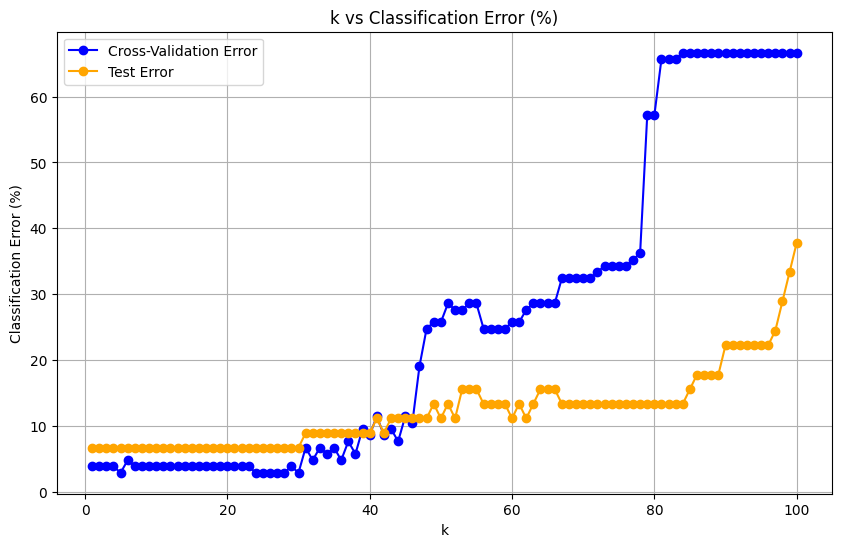

In [26]:
find_optimal_k('classification', D1_Xtrain, D1_Ytrain, D1_Xtest, D1_Ytest, list(range(1, 101)))

<p>As we can see, the optimal k-value appears to lie within the interval of 1 to 20, making k = 10 a reasonable choice for classification with $D_1$.</p>

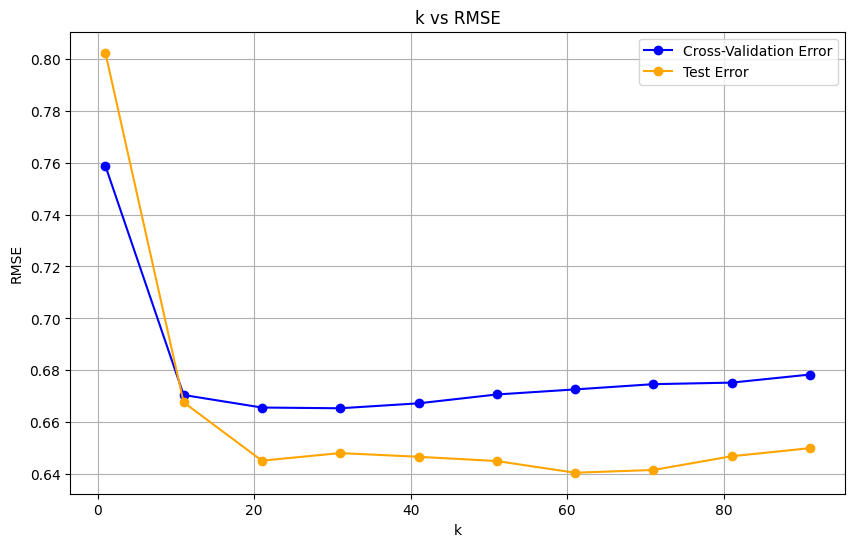

In [27]:
find_optimal_k('regression', D2_Xtrain, D2_Ytrain, D2_Xtest, D2_Ytest, list(range(1, 101, 10)))

<p>As we can see, the optimal k-value appears to lie within the interval of 10 to 30, making k = 20 a reasonable choice for regression with $D_2$.</p>

<h3>Exercise 3: Compare KNN Algorithm with Tree-Based Methods</h3>
<p>In this task, you are allowed to use Scikit-Learn. In particular, you will use the Nearest Neighbor
and Decision Tree implementations provided by Scikit-Learn.
</p>
<ul>
    <li>Use Nearest Neighbor and Decision Tree provided by Scikit-Learn to solve the classification
task for the two datasets.</li>
    <li>Provide the optimal hyperparameters for both methods. [Hint: Use Grid Search and
cross-validation and present results to support your solution].</li>
    <li>Present a comparison of the two methods using evaluation results on test datasets. [Hint:
It is better to use cross-validation to confirm your results].</li>
</ul>

<h4>Solution:</h4>

In [28]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV

<h4>Task 1: Nearest Neighbour and Decision Tree Classification with Scikit-Learn</h4>

In [29]:
def evaluate_models(X_train, Y_train, X_test, Y_test):
    
    # Nearest Neighbor
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    Y_predictions_knn = knn.predict(X_test)
    knn_accuracy = accuracy_score(Y_test, Y_predictions_knn)
    print(f'Nearest Neighbor Accuracy: {knn_accuracy:.4f}')

    # Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    Y_predictions_dt = dt.predict(X_test)
    dt_accuracy = accuracy_score(Y_test, Y_predictions_dt)
    print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

In [30]:
evaluate_models(D1_Xtrain, D1_Ytrain, D1_Xtest, D1_Ytest)

Nearest Neighbor Accuracy: 0.9333
Decision Tree Accuracy: 0.9778


In [31]:
evaluate_models(D2_Xtrain, D2_Ytrain, D2_Xtest, D2_Ytest)

Nearest Neighbor Accuracy: 0.5312
Decision Tree Accuracy: 0.6000


<h4>Task 2: Optimal Hyperparameters for both methods using GridSearchCV</h4>

<p>Although Task 1 focused solely on classification, I decided to address the following task for both classification and regression (for D2).</p>
<p>This function performs hyperparameter tuning using GridSearchCV for k-nearest-neighbors (KNN) or Decision Trees (DT) on both classification and regression tasks. It evaluates classification models on datasets $D_1$ and $D_2$ using accuracy and regression models on $D_2$ using RMSE. The best parameters and their corresponding scores are printed for each model and dataset. Finally, it returns the best parameters for further analysis.</p>

In [32]:
def gridsearchcv_evaluation(method, param_grid, D1_Xtrain, D1_Ytrain, D2_Xtrain, D2_Ytrain):
    
    if method == 'KNN':
        model1 = KNeighborsClassifier()
        model2 = KNeighborsRegressor()
    elif method == 'DT':
        model1 = DecisionTreeClassifier()
        model2 = DecisionTreeRegressor()

    # Classification
    D1_c = GridSearchCV(model1, param_grid, scoring = 'accuracy')
    D1_c.fit(D1_Xtrain, D1_Ytrain)
    
    D2_c = GridSearchCV(model1, param_grid, scoring = 'accuracy')
    D2_c.fit(D2_Xtrain, D2_Ytrain)

    # Regression
    D2_r = GridSearchCV(model2, param_grid, scoring = 'neg_root_mean_squared_error')
    D2_r.fit(D2_Xtrain, D2_Ytrain)

    # Results
    print('Classification Results')
    print(f'D1 - Best {method} Params: {D1_c.best_params_}')
    print(f'D1 - Best {method} Accuracy: {D1_c.best_score_:.4f}')
    print()
    print(f'D2 - Best {method} Params: {D2_c.best_params_}')
    print(f'D2 - Best {method} Accuracy: {D2_c.best_score_:.4f}')
    print()
    print('Regression Results')
    print(f'D2 - Best {method} Params: {D2_r.best_params_}')
    print(f'D2 - Best {method} RMSE: {-D2_r.best_score_:.4f}')

    return D1_c.best_params_, D2_c.best_params_, D2_r.best_params_

<h4>Optimal KNN Hyperparameter</h4>

<p>For KNN, we will only use k as our hyperparameter.</p>

In [33]:
param_grid = {
    'n_neighbors': range(1, 50)
}

D1_knn_param_c, D2_knn_param_c, D2_knn_param_r = gridsearchcv_evaluation("KNN", param_grid, D1_Xtrain, D1_Ytrain, D2_Xtrain, D2_Ytrain)

Classification Results
D1 - Best KNN Params: {'n_neighbors': 1}
D1 - Best KNN Accuracy: 0.9714

D2 - Best KNN Params: {'n_neighbors': 1}
D2 - Best KNN Accuracy: 0.6104

Regression Results
D2 - Best KNN Params: {'n_neighbors': 26}
D2 - Best KNN RMSE: 0.6650


<p>The results of the evaluation are that the KNN model performs well in the classification task for $D_1$ with high accuracy. For $D_2$, the accuracy in classification is considerably low, indicating that the model does not classify this dataset accurately (see explanation task 1). The same seems to be true for regression when comparing the obtained RMSE with previous tasks (no improvement)</p>

<h4>Optimal Decision Tree Hyperparameters</h4>

<p>For the decision tree, we use max_depth, min_samples_split, and min_samples_leaf to control overfitting by limiting tree complexity and ensuring meaningful splits and leaves.</p>

In [34]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

D1_dt_param_c, D2_dt_param_c, D2_dt_param_r = gridsearchcv_evaluation("DT", param_grid, D1_Xtrain, D1_Ytrain, D2_Xtrain, D2_Ytrain)

Classification Results
D1 - Best DT Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
D1 - Best DT Accuracy: 0.9333

D2 - Best DT Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
D2 - Best DT Accuracy: 0.5943

Regression Results
D2 - Best DT Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}
D2 - Best DT RMSE: 0.7141


<p>The evaluation results for Decision Trees (DT) show a good classification performance for $D_1$. As already said, $D_2$ is more challenging to classify.</p>

<h4>Task 3: Optimal Hyperparameter Model Comparision on Test Data</h4>

In [35]:
from sklearn.model_selection import cross_val_score

<p>This function evaluates KNN or Decision Tree models for both classification and regression tasks using cross-validation and test datasets. It performs cross-validation on $D_1$ for classification and $D_2$ for both classification and regression, calculating the mean accuracy and RMSE. The models are then trained on the full training data and tested on the corresponding test datasets. The function returns the mean cross-validation scores along with the test performance metrics for both datasets.</p>

In [36]:
def cross_validate_and_test(method):
    
    if method == 'KNN':
        model1 = KNeighborsClassifier(**D1_knn_param_c)
        model2 = KNeighborsRegressor(**D2_knn_param_r)
    elif method == 'DT':
        model1 = DecisionTreeClassifier(**D1_dt_param_c)
        model2 = DecisionTreeRegressor(**D2_dt_param_r)

    # CV for D1 classification
    D1_cv_scores = cross_val_score(model1, D1_Xtrain, D1_Ytrain, scoring = 'accuracy')
    D1_cv_mean = np.mean(D1_cv_scores)

    # CV for D2 classification
    D2_cv_scores_c = cross_val_score(model1, D2_Xtrain, D2_Ytrain, scoring = 'accuracy')
    D2_cv_mean_c = np.mean(D2_cv_scores_c)

    # CV for D2 regression
    D2_cv_scores_r = cross_val_score(model2, D2_Xtrain, D2_Ytrain, scoring = 'neg_root_mean_squared_error')
    D2_cv_mean_r = - np.mean(D2_cv_scores_r)

    # Test dataset evaluation
    model1.fit(D1_Xtrain, D1_Ytrain)
    D1_test_acc = accuracy_score(D1_Ytest, model1.predict(D1_Xtest))

    model1.fit(D2_Xtrain, D2_Ytrain)
    D2_test_acc = accuracy_score(D2_Ytest, model1.predict(D2_Xtest))

    model2.fit(D2_Xtrain, D2_Ytrain)
    D2_test_rmse = root_mean_squared_error(D2_Ytest, model2.predict(D2_Xtest))

    return D1_cv_mean, D1_test_acc, D2_cv_mean_c, D2_test_acc, D2_cv_mean_r, D2_test_rmse

In [37]:
# Evaluate KNN
D1_knn_cv, D1_knn_test, D2_knn_cv_c, D2_knn_test_c, D2_knn_cv_r, D2_knn_test_r = cross_validate_and_test('KNN')

# Evaluate Decision Tree
D1_dt_cv, D1_dt_test, D2_dt_cv_c, D2_dt_test_c, D2_dt_cv_r, D2_dt_test_r = cross_validate_and_test('DT')

# Print Comparison
print('KNN Results:')
print(f' (Classification) D1 Cross-Val Accuracy: {D1_knn_cv:.4f}, Test Accuracy: {D1_knn_test:.4f}')
print(f' (Classification) D2 Cross-Val Accuracy: {D2_knn_cv_c:.4f}, Test Accuracy: {D2_knn_test_c:.4f}')
print(f' (Regression) D2 Cross-Val RMSE: {D2_knn_cv_r:.4f}, Test RMSE: {D2_knn_test_r:.4f}')
print()
print('Decision Tree Results:')
print(f' (Classification) D1 Cross-Val Accuracy: {D1_dt_cv:.4f}, Test Accuracy: {D1_dt_test:.4f}')
print(f' (Classification) D2 Cross-Val Accuracy: {D2_dt_cv_c:.4f}, Test Accuracy: {D2_dt_test_c:.4f}')
print(f' (Regression) D2 Cross-Val RMSE: {D2_dt_cv_r:.4f}, Test RMSE: {D2_dt_test_r:.4f}')

KNN Results:
 (Classification) D1 Cross-Val Accuracy: 0.9714, Test Accuracy: 0.9333
 (Classification) D2 Cross-Val Accuracy: 0.6104, Test Accuracy: 0.5813
 (Regression) D2 Cross-Val RMSE: 0.6650, Test RMSE: 0.6469

Decision Tree Results:
 (Classification) D1 Cross-Val Accuracy: 0.9333, Test Accuracy: 0.9778
 (Classification) D2 Cross-Val Accuracy: 0.5737, Test Accuracy: 0.5979
 (Regression) D2 Cross-Val RMSE: 0.7238, Test RMSE: 0.7444


<p>The results show that for KNN, the model performs excellently on $D_1$ classification with high cross-validation accuracy and good test accuracy. However, it still struggles with $D_2$.</p>
<p>For Decision Trees, the model also performs well on $D_1$ classification with a high cross-validation accuracy and test accuracy. Like KNN, the Decision Tree struggles with $D_2$</p>